In [112]:
import pandas as pd

customer = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/CustomersData.csv', encoding='UTF-8' )
cupon = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/Discount_Coupon.csv')
spend = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/Marketing_Spend.csv')
sales = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/Online_Sales.csv')
tax = pd.read_csv('/Users/parkseeun/Desktop/DA_Practice/projects/data/Tax_amount.csv')

## 1. 데이터 구조 파악

### 1-1) 데이터 탐색

In [80]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [32]:
cupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [36]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [7]:
tax.info() #gst는 서비스세, 부가가치세, 소비세 등 간접세를 대체하는 세법


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Category  20 non-null     object
 1   GST               20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


### 1-2) 데이터 타입 변환

In [113]:
sales['Transaction_Date'] = pd.to_datetime(sales['Transaction_Date'], format='%m/%d/%Y')
sales['Month'] = sales['Transaction_Date'].dt.strftime('%b') 

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.4+ MB


In [114]:
sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [83]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [115]:
# spend 데이터도 date에서 month를 뽑아서 데이터셋 합칠 수 있도록 구성 
# strftime('%b')는 Python의 datetime 모듈에서 날짜를 특정 형식으로 포맷팅할 때 사용하는 메서드
spend['Date'] = pd.to_datetime(spend['Date'], format='%m/%d/%Y')
spend['Month'] = spend['Date'].dt.strftime('%b')
spend.head(2)


,Date,Offline_Spend,Online_Spend,Month
0,2019-01-01,4500,2424.50,Jan
1,2019-01-02,4500,3480.36,Jan


### 1-3) 데이터 merge

In [116]:
# customer id를 기준으로 merge
merge_cus_sales = pd.merge(customer, sales, on='CustomerID', how='inner')

In [117]:
merge_cus_sales.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan


In [119]:
# merge_cus_sales과 cupon 데이터 셋을 month와 product_category로 합치기
merge_cus_sales_cupon = pd.merge(merge_cus_sales, cupon, on=['Month', 'Product_Category'], how='left')
merge_cus_sales_cupon.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0


In [120]:
# merge_cus_sales_cupon와 spend 데이터 셋을 Month로 합치기
merge_cus_sales_cupon_spend = pd.merge(merge_cus_sales_cupon, spend, on=['Month'], how='left')
merge_cus_sales_cupon_spend.head(2)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.50
1,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-02,4500,3480.36


In [121]:
# tax_amount와 merge_cus_sales_cupon_spend 데이터 셋을 product_category로 합치기
merged_df = pd.merge(merge_cus_sales_cupon_spend, tax, on=['Product_Category'], how='left')
merged_df.head(10)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.50,10%
1,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-02,4500,3480.36,10%
2,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-03,4500,1576.38,10%
3,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-04,4500,2928.55,10%
4,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-05,4500,4055.30,10%
5,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-06,4500,3796.85,10%
6,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-07,4500,2579.52,10%
7,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-08,5000,2551.38,10%
8,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-09,5000,3287.83,10%
9,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-10,5000,515.44,10%


In [106]:
# # date 컬럼과 Transaction_Date_y 데이터가 같기 때문에 date 컬럼 제거
# merged_df.drop(columns=['Date'], inplace=True)


In [122]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614200 entries, 0 to 1614199
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   CustomerID           1614200 non-null  int64         
 1   Gender               1614200 non-null  object        
 2   Location             1614200 non-null  object        
 3   Tenure_Months        1614200 non-null  int64         
 4   Transaction_ID       1614200 non-null  int64         
 5   Transaction_Date     1614200 non-null  datetime64[ns]
 6   Product_SKU          1614200 non-null  object        
 7   Product_Description  1614200 non-null  object        
 8   Product_Category     1614200 non-null  object        
 9   Quantity             1614200 non-null  int64         
 10  Avg_Price            1614200 non-null  float64       
 11  Delivery_Charges     1614200 non-null  float64       
 12  Coupon_Status        1614200 non-null  object        
 1

In [108]:
# # 원본 데이터프레임에서 직접 컬럼 이름 변경
# merged_df.rename(columns={'Transaction_Date_y': 'Transaction_Date'}, inplace=True)

In [109]:
# merged_df.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Offline_Spend,Online_Spend,GST
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,4500,2424.50,10%
1,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,4500,3480.36,10%


### 1-3) 중복제거

In [123]:
len(merged_df)

1614200

In [124]:
# 중복 데이터 개수 확인
merged_df.duplicated(subset=['CustomerID','Transaction_ID','Transaction_Date','Product_Category','Quantity', 'Coupon_Status']).sum()


1567993

In [126]:
# 중복 데이터 제거
merged_df.drop_duplicates(subset=['CustomerID','Transaction_ID','Transaction_Date','Product_Category','Quantity', 'Coupon_Status']
                          , keep='first', inplace=True)


In [127]:
len(merged_df)

46207

In [129]:
merged_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,10%
31,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,10%
62,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,2019-01-01,4500,2424.5,10%
93,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,2019-01-01,4500,2424.5,18%
124,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,2019-01-01,4500,2424.5,18%


In [130]:
merged_df['Date']

0         2019-01-01
31        2019-01-01
62        2019-01-01
93        2019-01-01
124       2019-01-01
             ...    
1614045   2019-12-01
1614076   2019-12-01
1614107   2019-12-01
1614138   2019-12-01
1614169   2019-12-01
Name: Date, Length: 46207, dtype: datetime64[ns]

## 2. 데이터 전처리

### 2-1) 결측치 이상치 탐색

In [131]:
merged_df.isnull().sum()

CustomerID               0
Gender                   0
Location                 0
Tenure_Months            0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
Coupon_Code            393
Discount_pct           393
Date                     0
Offline_Spend            0
Online_Spend             0
GST                      0
dtype: int64

In [132]:
# 원본 데이터프레임에서 결측치를 0으로 대체
merged_df['Coupon_Code'].fillna(0, inplace=True)
merged_df['Discount_pct'].fillna(0, inplace=True)

/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/807228124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Coupon_Code'].fillna(0, inplace=True)
/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/807228124.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [133]:
merged_df.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
Month                  0
Coupon_Code            0
Discount_pct           0
Date                   0
Offline_Spend          0
Online_Spend           0
GST                    0
dtype: int64

## 3. EDA 분석

### 1) 고객데이터 분석

In [135]:
# 전체 고객 수 확인
total_customers = len(merged_df['CustomerID'])
total_customers

46207

In [136]:
# 고유 고객 목록
customer_list = merged_df['CustomerID'].nunique()
customer_list

1468

In [175]:
# Tenure_Months의 값만 확인
unique_tenure_value = merged_df['Tenure_Months'].unique()
unique_tenure_value.max() # 50
unique_tenure_value.min() # 2

2

In [178]:
# Tenure_Months 기준으로 고객의 수 카운트
customer_count_by_tenure = merged_df.groupby('Tenure_Months').size().reset_index(name='Customer_Count')
customer_count_by_tenure


,Tenure_Months,Customer_Count
0,2,573
1,3,563
2,4,895
3,5,1345
4,6,1157
5,7,848
6,8,1064
7,9,543
8,10,1248
9,11,808


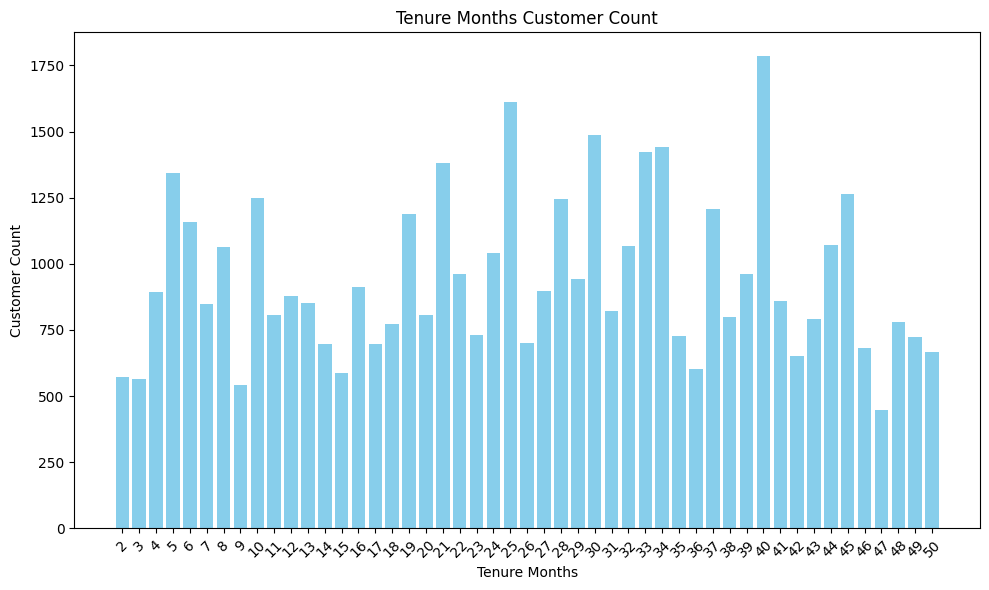

In [181]:
# 시각화
plt.figure(figsize=(10, 6))
plt.bar(customer_count_by_tenure['Tenure_Months'].astype(str), customer_count_by_tenure['Customer_Count'], color='skyblue')
plt.title('Tenure Months Customer Count')
plt.xlabel('Tenure Months')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [180]:
# 고객 등급 매기기

def customer_grade (tenure_months) : 
    if tenure_months <= 6 :
        return 'new'
    elif tenure_months <= 12 :
        return 'regular'
    elif tenure_months <= 24 :
        return 'loyal'
    elif tenure_months >= 25 :
        return 'vip'
    
merged_df['Customer_Grade'] = merged_df['Tenure_Months'].apply(customer_grade)

merged_df.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST,Customer_Grade
0,17850,M,Chicago,12,16679,2019-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,10%,regular
31,17850,M,Chicago,12,16680,2019-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,10%,regular


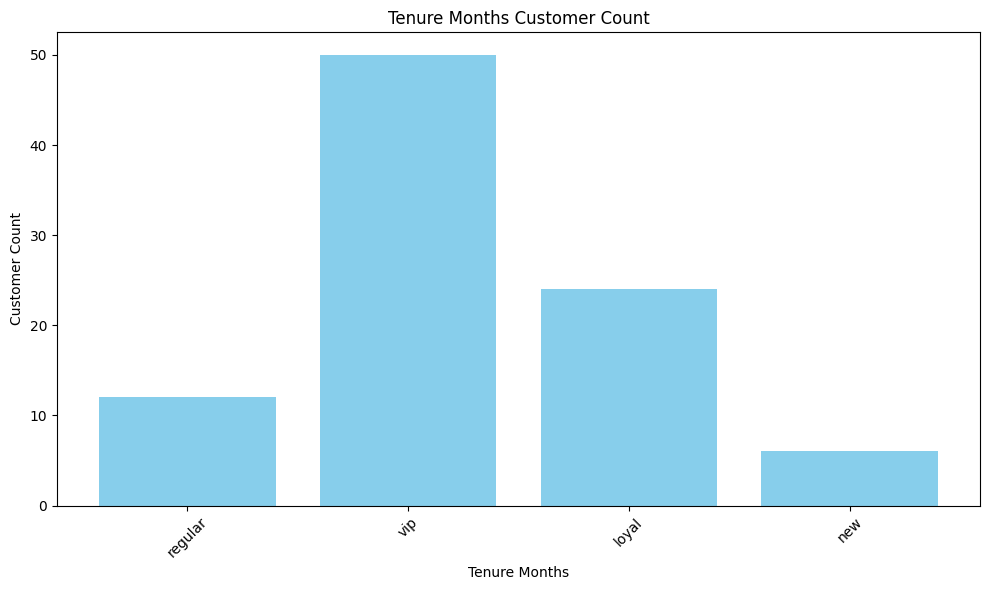

In [184]:
# 시각화
plt.figure(figsize=(10, 6))
plt.bar(merged_df['Customer_Grade'].astype(str), merged_df['Tenure_Months'], color='skyblue')
plt.title('Tenure Months Customer Count')
plt.xlabel('Tenure Months')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [185]:
# 각 등급별 비율 확인
merged_df['Customer_Grade'].value_counts()

Customer_Grade
vip        25662
loyal      10621
regular     5391
new         4533
Name: count, dtype: int64

In [187]:
# 고객별 구매 금액 확인
merged_df['Transcation_Amount'] = merged_df['Quantity'] * merged_df['Avg_Price']
merged_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST,Customer_Grade,Transcation_Amount
0,17850,M,Chicago,12,16679,2019-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,10%,regular,153.71
31,17850,M,Chicago,12,16680,2019-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,10%,regular,153.71
62,17850,M,Chicago,12,16681,2019-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,...,Used,Jan,OFF10,10.0,2019-01-01,4500,2424.5,10%,regular,2.05
93,17850,M,Chicago,12,16682,2019-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,...,Not Used,Jan,SALE10,10.0,2019-01-01,4500,2424.5,18%,regular,87.65
124,17850,M,Chicago,12,16682,2019-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,...,Used,Jan,AIO10,10.0,2019-01-01,4500,2424.5,18%,regular,16.50


In [191]:
# 월별로 그룹화하여 고객별 거래 금액 합산
monthly_spend = merged_df.groupby(['CustomerID', merged_df['Transaction_Date']])['Transcation_Amount'].sum().reset_index()
monthly_spend

,CustomerID,Transaction_Date,Transcation_Amount
0,12346,2019-09,30.99
1,12347,2019-03,11216.05
2,12347,2019-11,2593.71
3,12348,2019-06,748.42
4,12348,2019-10,665.09
...,...,...,...
2573,18269,2019-04,62.25
2574,18269,2019-06,14.69
2575,18277,2019-10,298.00
2576,18283,2019-07,1770.29


In [192]:
# 최대 구매금액 확인
monthly_spend.max()

CustomerID               18283
Transaction_Date       2019-12
Transcation_Amount    36664.69
dtype: object

In [193]:
# 최소 구매 금액 확인
monthly_spend.min()

CustomerID              12346
Transaction_Date      2019-01
Transcation_Amount       0.51
dtype: object

In [194]:
# 최대 구매 고객과 최소 구매고객의 등급 확인
filter_max_spend = merged_df[merged_df['CustomerID'] == 18283]
filter_max_spend

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST,Customer_Grade,Transcation_Amount
1242980,18283,F,New Jersey,36,34028,2019-07,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1,...,Clicked,Jul,NJ10,10.0,2019-07-01,1500,1932.64,5%,vip,13.50
1243011,18283,F,New Jersey,36,34028,2019-07,GGOEGOCR017899,Recycled Paper Journal Set,Office,1,...,Used,Jul,OFF10,10.0,2019-07-01,1500,1932.64,10%,vip,3.99
1243073,18283,F,New Jersey,36,34030,2019-07,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,1,...,Used,Jul,SALE10,10.0,2019-07-01,1500,1932.64,18%,vip,13.59
1243104,18283,F,New Jersey,36,34030,2019-07,GGOEGALB034116,Google Women's Vintage Hero Tee Black,Apparel,2,...,Clicked,Jul,SALE10,10.0,2019-07-01,1500,1932.64,18%,vip,9.12
1243166,18283,F,New Jersey,36,34030,2019-07,GGOEGHPJ080310,Google Blackout Cap,Headgear,1,...,Used,Jul,HGEAR10,10.0,2019-07-01,1500,1932.64,5%,vip,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245925,18283,F,New Jersey,36,40288,2019-10,GGOEGOBG023599,Colored Pencil Set,Office,4,...,Not Used,Oct,OFF10,10.0,2019-10-01,3000,1991.44,10%,vip,11.96
1245956,18283,F,New Jersey,36,40289,2019-10,GGOEGAYR068226,Google Youth Short Sleeve Tee Red,Apparel,1,...,Used,Oct,SALE10,10.0,2019-10-01,3000,1991.44,18%,vip,15.19
1246018,18283,F,New Jersey,36,40290,2019-10,GGOEAAEJ030916,Android Women's Long Sleeve Blended Cardigan Grey,Apparel,1,...,Used,Oct,SALE10,10.0,2019-10-01,3000,1991.44,18%,vip,15.00
1246049,18283,F,New Jersey,36,40290,2019-10,GGOEGAEB027814,Google Women's Short Sleeve Hero Tee Black,Apparel,2,...,Used,Oct,SALE10,10.0,2019-10-01,3000,1991.44,18%,vip,33.98


In [195]:
filter_min_spend = merged_df[merged_df['CustomerID'] == 12346]
filter_min_spend

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST,Customer_Grade,Transcation_Amount
1399896,12346,F,New York,31,38223,2019-09,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,...,Used,Sep,SALE30,30.0,2019-09-01,3000,2424.97,18%,vip,19.99
1399926,12346,F,New York,31,38223,2019-09,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,...,Used,Sep,OFF30,30.0,2019-09-01,3000,2424.97,10%,vip,11.00


결론
- 월별 소비가 가장 많은 고객과 소비가 가장 낮은 고객 모두 등급이 VIP임
- 월별 소비가 가장 낮은 고객은 회원 유지기간은 길지만 소비가 적기 때문에, 해당 고객의 소비를 높일 수 있는 방법 필요
- 잠재적 이탈 확률이 높은 고객으로 분류

In [210]:
# 고객별 거래 빈도수 확인 
# customer_transcation_frequency = merged_df.groupby('CustomerID').size().reset_index(name='Transcation_Frequency')
# customer_transcation_frequency

# 거래 날짜와 고객 ID를 기준으로 그룹화하여 구매 빈도수 계산
purchase_frequency = merged_df.groupby(['CustomerID', 'Date']).size().reset_index(name='Purchase_Frequency')
purchase_frequency

# 고객 id를 기준으로 기존 데이터 셋과 합치기
merged_df = pd.merge(merged_df, purchase_frequency, on='CustomerID', how='inner')
merged_df.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Code,Discount_pct,Date_x,Offline_Spend,Online_Spend,GST,Customer_Grade,Transcation_Amount,Date_y,Purchase_Frequency
0,17850,M,Chicago,12,16679,2019-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,ELEC10,10.0,2019-01-01,4500,2424.5,10%,regular,153.71,2019-01-01,272
1,17850,M,Chicago,12,16680,2019-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,ELEC10,10.0,2019-01-01,4500,2424.5,10%,regular,153.71,2019-01-01,272


In [211]:
# 거래 빈도 수 값 확인
merged_df['Purchase_Frequency'].unique()

array([272,  16,   1,  26,  14,  18,   2,   4,   5,  19,  12,  31,  28,
        32,  37,   8,  70,  69,  87,  38,  15, 100,  24,  25,  39,  17,
        10,  13,   9,   7,   3,  23,  27,  65,   6,  57,  45,  29,  51,
        72,  33,  20,  64, 114, 162, 197,  56,  34,  49,  21,  11,  54,
        68,  66,  80,  59,  53,  44,  58,  41,  43,  48,  60,  36,  62,
        40,  30,  22,  67,  42,  85,  55,  91,  50,  35,  75, 101,  47,
        61,  52, 130,  82,  46, 108,  95, 150,  73,  98,  63,  90,  84,
       134,  89,  76, 102, 113,  77,  94,  86,  79, 140, 126, 110,  78,
        88,  81,  83, 116,  71, 232])

In [212]:
# 이탈 위험 고객 분류
# churn risk : 이탈 위험 고객
def classify_customer(frequency) :
    if frequency <= 20 : 
        return 'danger'
    elif 21 <= frequency <= 60 :
        return 'middle'
    else : 
        return 'low'
    
merged_df['Churn_Risk'] = merged_df['Purchase_Frequency'].apply(classify_customer)
merged_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Discount_pct,Date_x,Offline_Spend,Online_Spend,GST,Customer_Grade,Transcation_Amount,Date_y,Purchase_Frequency,Churn_Risk
0,17850,M,Chicago,12,16679,2019-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,10.0,2019-01-01,4500,2424.5,10%,regular,153.71,2019-01-01,272,low
1,17850,M,Chicago,12,16680,2019-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,10.0,2019-01-01,4500,2424.5,10%,regular,153.71,2019-01-01,272,low
2,17850,M,Chicago,12,16681,2019-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,...,10.0,2019-01-01,4500,2424.5,10%,regular,2.05,2019-01-01,272,low
3,17850,M,Chicago,12,16682,2019-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,...,10.0,2019-01-01,4500,2424.5,18%,regular,87.65,2019-01-01,272,low
4,17850,M,Chicago,12,16682,2019-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,...,10.0,2019-01-01,4500,2424.5,18%,regular,16.50,2019-01-01,272,low


In [229]:
# 거래 빈도 수를 기준으로 이탈 위험이 높은 그룹군 시각화 

# 고객 그룹별 구매 빈도의 평균 계산
average_purchase_frequency = merged_df.groupby('Churn_Risk')['Purchase_Frequency'].mean().reset_index()
average_purchase_frequency


,Churn_Risk,Purchase_Frequency
0,danger,10.352988
1,low,95.349398
2,middle,36.574790


/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/2414197325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_purchase_frequency, x='Purchase_Frequency', y='Churn_Risk', palette='viridis')


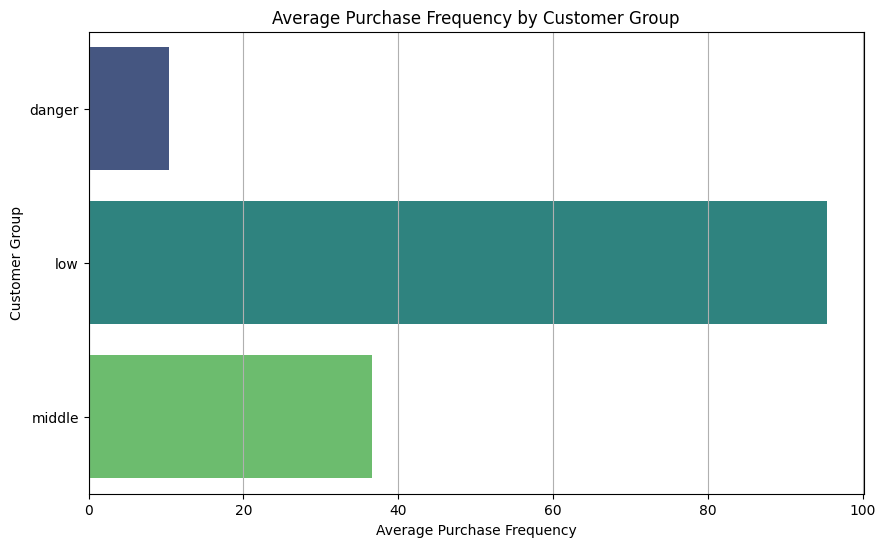

In [230]:
# 가로형 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=average_purchase_frequency, x='Purchase_Frequency', y='Churn_Risk', palette='viridis')
plt.title('Average Purchase Frequency by Customer Group')
plt.xlabel('Average Purchase Frequency')
plt.ylabel('Customer Group')
plt.grid(axis='x')
plt.show()

In [227]:
merged_df['Churn_Risk'].value_counts()

Churn_Risk
middle    57635
danger    56781
low       17098
Name: count, dtype: int64

#### 결론
- 이탈 위험 고객이 낮은 사람들이 많음
- 이탈 위험 중간 고객과 높은 고객은 생각보다 적음

In [232]:
# 고객의 등급과 이탈간의 관계 확인

crosstab = pd.crosstab(merged_df['Customer_Grade'], merged_df['Churn_Risk'])
crosstab


Churn_Risk,danger,low,middle
Customer_Grade,,,
loyal,12393,2969,13420
new,3714,1017,5113
regular,8752,986,4495
vip,31922,12126,34607


결론
- 유지기간이 길수록 구매력이 낮음 (유지기간이 긴 사람들에게 구매력을 높일 수 있는 방법 필요)

In [139]:
# 고객별 첫 거래 날짜 확인
first_transcation = merged_df.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_transcation


,CustomerID,Transaction_Date
0,12346,2019-09-15
1,12347,2019-03-24
2,12348,2019-06-22
3,12350,2019-12-14
4,12356,2019-09-15
...,...,...
1463,18259,2019-04-05
1464,18260,2019-06-22
1465,18269,2019-04-05
1466,18277,2019-10-23


In [149]:
# 월별 거래 수 계산
merged_df['Transaction_Date'] = merged_df['Transaction_Date'].dt.to_period('M')
merged_df['Transaction_Date']

0          2019-01
31         2019-01
62         2019-01
93         2019-01
124        2019-01
            ...   
1614045    2019-12
1614076    2019-12
1614107    2019-12
1614138    2019-12
1614169    2019-12
Name: Transaction_Date, Length: 46207, dtype: period[M]

In [241]:
# 월별 거래 수 계산
monthly_transcation_count = merged_df.groupby('Transaction_Date').size().reset_index(name='Transcation_Count')
monthly_transcation_count

,Transaction_Date,Transcation_Count
0,2019-01,9319
1,2019-02,8518
2,2019-03,11031
3,2019-04,10567
4,2019-05,10643
5,2019-06,10663
6,2019-07,15433
7,2019-08,14714
8,2019-09,10995
9,2019-10,9423


/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/959573648.py:8: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/959573648.py:8: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/959573648.py:8: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/959573648.py:8: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/959573648.py:8: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()  # 레이아웃 조정
/Users/parkseeun/Library/Python/3.11/lib/python/site-

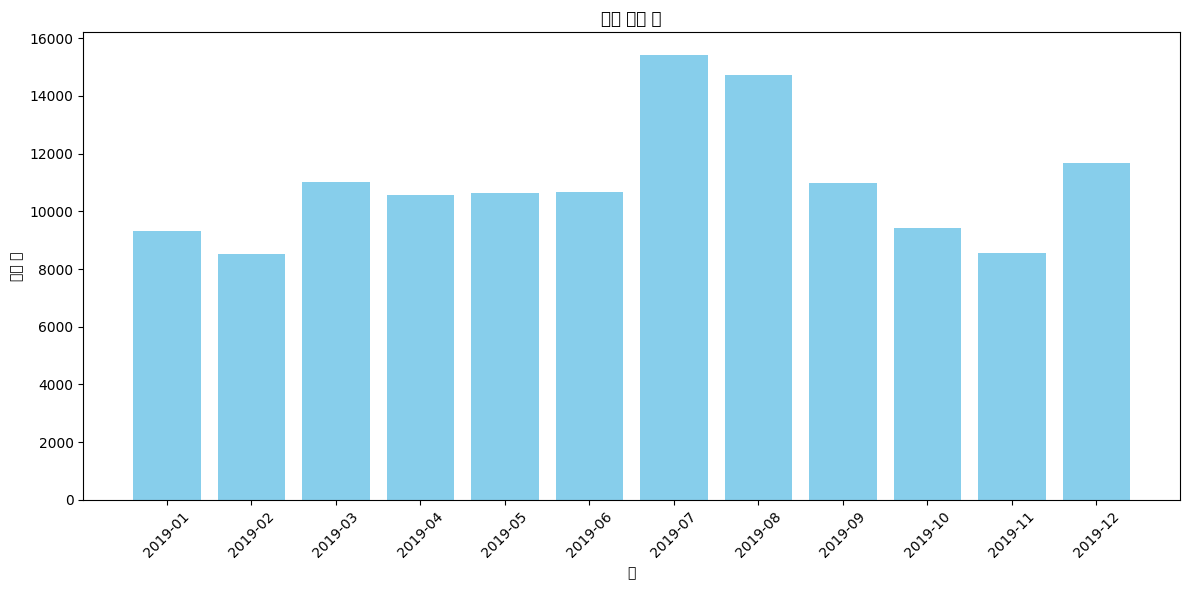

In [242]:
# 시각화
plt.figure(figsize=(12, 6))
plt.bar(monthly_transcation_count['Transaction_Date'].astype(str), monthly_transcation_count['Transcation_Count'], color='skyblue')
plt.title('월별 거래 수')
plt.xlabel('월')
plt.ylabel('거래 수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

결론
- 7,8,12월에 거래가 많음

In [244]:
# 월별 신규 고객 수 확인
monthly_new_customers = merged_df.groupby('Transaction_Date')['CustomerID'].count().reset_index()
monthly_new_customers.columns = ['Transaction_Date', 'New_Customers']  # 컬럼 이름 변경
monthly_new_customers.sort_values(ascending=False, by='New_Customers')


,Transaction_Date,New_Customers
6,2019-07,15433
7,2019-08,14714
11,2019-12,11663
2,2019-03,11031
8,2019-09,10995
5,2019-06,10663
4,2019-05,10643
3,2019-04,10567
9,2019-10,9423
0,2019-01,9319


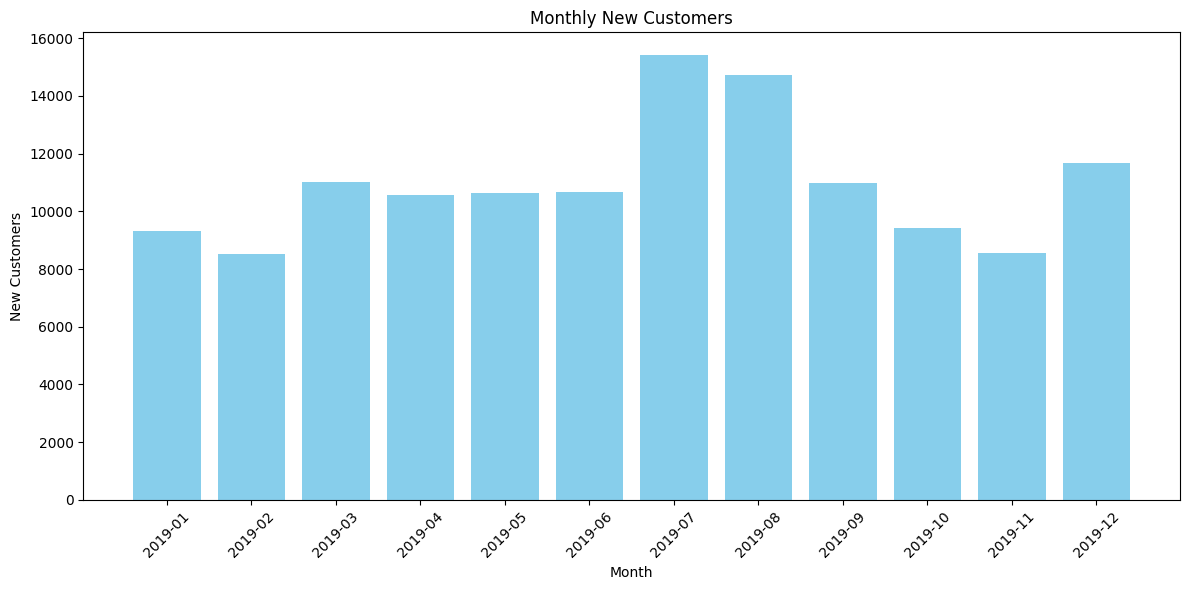

In [246]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(monthly_new_customers['Transaction_Date'].astype(str), monthly_new_customers['New_Customers'], color='skyblue')
plt.title('Monthly New Customers')
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

결론
- 7,8,12월에 신규 고객이 많음

In [40]:
# 고객의 성별 분포 확인
# 결론 : 여성의 분포도가 높다. -> 여성 고객이 많음
gender_counts = merged_df['Gender'].value_counts()
gender_counts

Gender
F    33007
M    19917
Name: count, dtype: int64

In [42]:
# 고객의 위치 분포
# 결론 : california, chicago의 비율이 높고, washington DC의 고객 비중이 낮음
location_counts = merged_df['Location'].value_counts()
location_counts

Location
Chicago          18380
California       16136
New York         11173
New Jersey        4503
Washington DC     2732
Name: count, dtype: int64

In [46]:
# 고객의 평균 구매 금액
average_purchase = merged_df.groupby('CustomerID')['Avg_Price'].mean()
average_purchase.sort_values(ascending=False)

CustomerID
14501    204.0000
15661    203.0000
16333    202.8450
15797    199.0000
13551    190.5475
           ...   
16593      1.5900
16861      1.5900
13748      1.2400
12875      1.2000
13068      1.0000
Name: Avg_Price, Length: 1468, dtype: float64

In [47]:
# 고객의 총 구매 금액
total_purchase = merged_df.groupby('CustomerID')['Avg_Price'].sum()
total_purchase.sort_values(ascending=False)

CustomerID
12748    31285.63
14911    29721.53
14606    29676.79
15311    29633.75
17841    27616.21
           ...   
18233        1.99
16593        1.59
13748        1.24
12875        1.20
13068        1.00
Name: Avg_Price, Length: 1468, dtype: float64

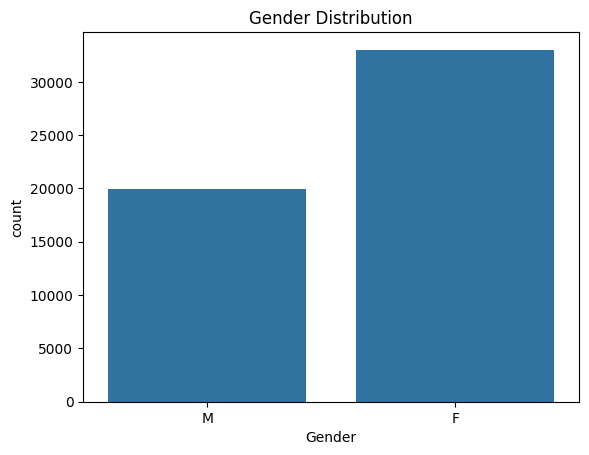

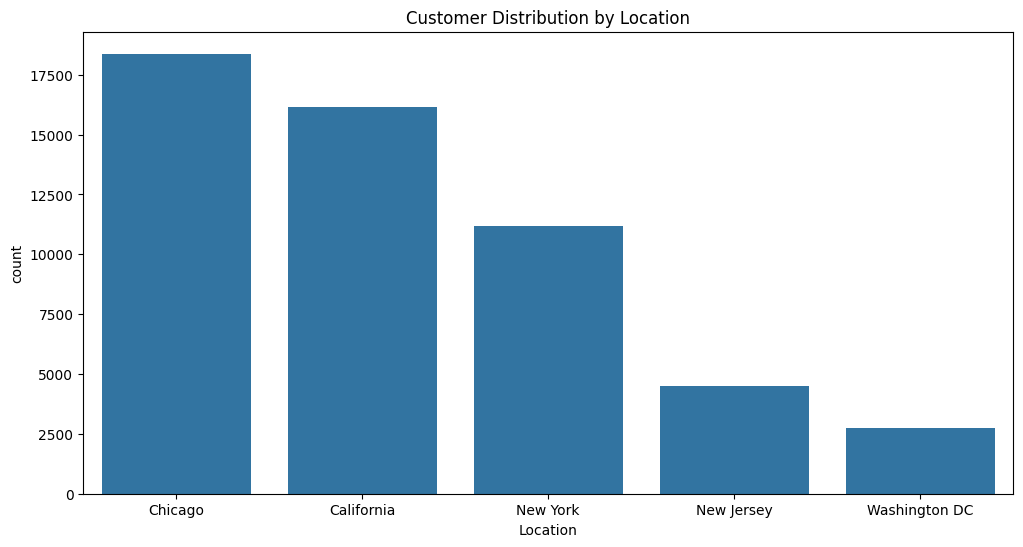

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 성별 분포
sns.countplot(x='Gender', data=merged_df)
plt.title('Gender Distribution')
plt.show()

# 위치별 고객 수
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=merged_df)
plt.title('Customer Distribution by Location')
plt.show()

In [65]:
# 고객의 월별 구매 패턴
# 계절성과 구매패턴에도 관련이 있을지??
merged_df['Month'] = merged_df['Transaction_Date'].dt.to_period('M')
monthly_sales = merged_df.groupby('Month')['Quantity'].sum().reset_index()
monthly_sales.sort_values(ascending=True, by='Month')

,Month,Quantity
0,2019-01,20140
1,2019-02,16575
2,2019-03,20787
3,2019-04,25277
4,2019-05,18715
5,2019-06,21619
6,2019-07,22898
7,2019-08,27457
8,2019-09,19353
9,2019-10,17425


In [54]:
merged_df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Month'],
      dtype='object')

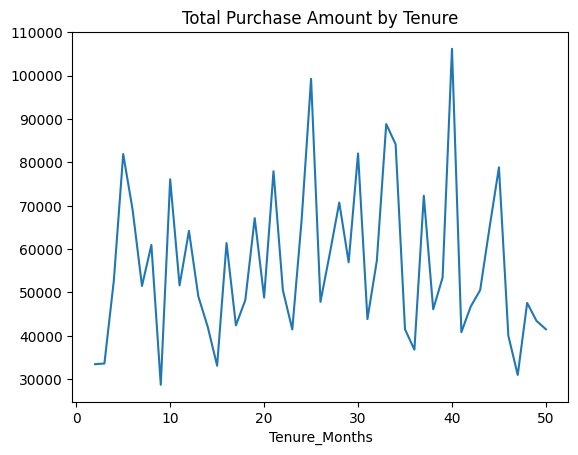

In [67]:
# 고객의 보유 기간에 따른 구매 패턴
tenure_purchase = merged_df.groupby('Tenure_Months')['Avg_Price'].sum()
sns.lineplot(x=tenure_purchase.index, y=tenure_purchase.values)
plt.title('Total Purchase Amount by Tenure')
plt.show()

### 2) 상품 분석

In [249]:
# 제품 카테고리별 판매량
# office 판매량이 가장 높음
# plt.figure(figsize=(30, 6))
# category_sales = merged_df.groupby('Product_Category')['Quantity'].sum().reset_index()
# sns.barplot(x='Product_Category', y='Quantity', data=category_sales)
# plt.title('Sales Quantity by Product Category')
# plt.show()

# 판매량 집계 및 정렬
top_products = merged_df.groupby('Product_Category')['Quantity'].sum().reset_index()

# 판매량 기준으로 내림차순 정렬
top_products = top_products.sort_values(by='Quantity', ascending=False)

# 상위 5개 제품 선택
top_5_products = top_products.head(5)
top_5_products


,Product_Category,Quantity
18,Office,230328
6,Drinkware,97648
2,Apparel,82509
12,Lifestyle,62356
16,Nest-USA,58237


In [251]:
# 상품군별 매출액 확인
merged_df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Month', 'Coupon_Code', 'Discount_pct', 'Date_x',
       'Offline_Spend', 'Online_Spend', 'GST', 'Customer_Grade',
       'Transcation_Amount', 'Date_y', 'Purchase_Frequency', 'Churn_Risk'],
      dtype='object')

In [266]:
# Product_Category와 Transcation_Amount 확인
category_amount = merged_df.groupby('Product_Category')['Transcation_Amount'].sum().reset_index()
category_amount.sort_values(by='Transcation_Amount', ascending=False)

,Product_Category,Transcation_Amount
16,Nest-USA,6938964.62
2,Apparel,1532613.52
14,Nest,1350561.93
18,Office,736553.81
6,Drinkware,655482.97
17,Notebooks & Journals,468613.02
4,Bags,398223.31
10,Headgear,221669.20
15,Nest-Canada,190588.78
12,Lifestyle,188822.27


/var/folders/8r/z6n1w9pd1x52jq7j61qcry0r0000gn/T/ipykernel_921/2184839633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_amount, x='Product_Category', y='Transcation_Amount', palette='viridis')


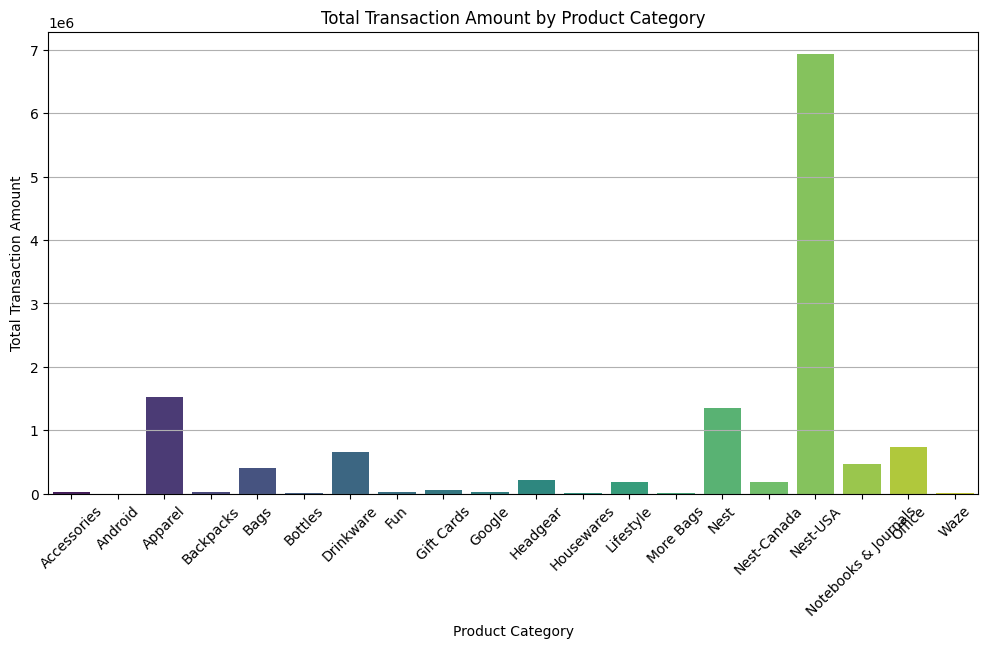

In [267]:
# 바 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=category_amount, x='Product_Category', y='Transcation_Amount', palette='viridis')
plt.title('Total Transaction Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.grid(axis='y')
plt.show()

결론
- 판매량은 Office > Drinkware > apparel	> Lifestyle	> Nest-USA 순서로 높다. 
- 매출액은 Nest-USA	>  Apparel > Nest > Office > Drinkware 순서로 높다. 
- 판매량이 높다고 해서 매출액이 높지는 않음

In [271]:
# 각 상품별 평균 단가 확인
avg_price_per_category = merged_df.groupby('Product_Category')['Avg_Price'].mean().reset_index()
avg_price_per_category.sort_values(by='Avg_Price', ascending=False)

,Product_Category,Avg_Price
14,Nest,191.671109
15,Nest-Canada,158.717176
16,Nest-USA,124.518487
8,Gift Cards,106.123079
3,Backpacks,77.946590
4,Bags,29.812574
2,Apparel,20.148908
13,More Bags,19.609596
9,Google,17.585965
1,Android,15.782500


In [270]:
# 각 상품별 판매량 평균
avg_quantity_per_category = merged_df.groupby('Product_Category')['Quantity'].mean().reset_index()
avg_quantity_per_category.sort_values(by='Quantity', ascending=False)

,Product_Category,Quantity
11,Housewares,18.893333
17,Notebooks & Journals,17.909761
18,Office,14.101139
6,Drinkware,10.512219
12,Lifestyle,8.123502
4,Bags,7.824875
5,Bottles,6.826142
0,Accessories,6.689024
7,Fun,6.688213
10,Headgear,6.668819


결론
- Nest-USA가 매출액이 높은 이유는 단가가 높기 때문
- 판매량으로 봤을 때 office의 판매율이 더 높았음 

In [275]:
# 월별 매출이 높은 상품군 확인
monthly_product = merged_df.groupby(['Product_Category', 'Transaction_Date'])['Transcation_Amount'].sum().reset_index()
monthly_product


,Product_Category,Transaction_Date,Transcation_Amount
0,Accessories,2019-01,257.85
1,Accessories,2019-03,119.98
2,Accessories,2019-04,263.93
3,Accessories,2019-05,312.08
4,Accessories,2019-06,1939.45
...,...,...,...
202,Waze,2019-08,1562.06
203,Waze,2019-09,1170.59
204,Waze,2019-10,1153.00
205,Waze,2019-11,2724.61


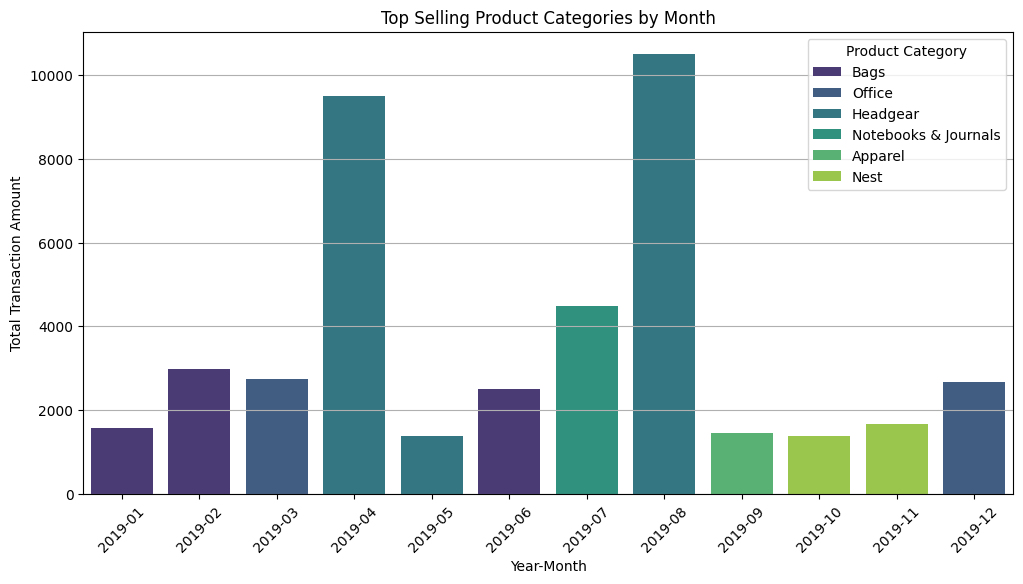

In [280]:
# 가장 매출이 높은 상품군 추출
top_product_sales = merged_df.loc[merged_df.groupby('Transaction_Date')['Transcation_Amount'].idxmax()]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_product_sales, x='Transaction_Date', y='Transcation_Amount', hue='Product_Category', palette='viridis')
plt.title('Top Selling Product Categories by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.legend(title='Product Category')
plt.grid(axis='y')
plt.show()

결론
- 4, 8월에는 Headgear 상품 판매량이 높음
- 1,2,6월에는 bags 상품 판매량이 높음
- 3,12월에는 office 상품 판매량이 높음 
- 7월에는 Notebooks & journals 판매량이 높음
- 9월에는 Apperarel
- 10, 11월에는 Nest

계절별로 판매 상품과 상관관계가 있는지? 

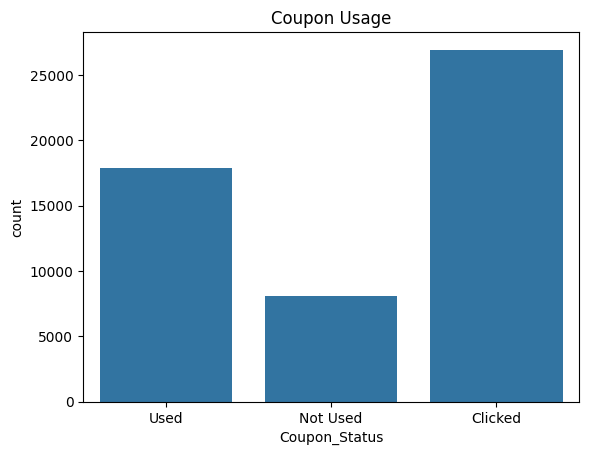

In [75]:
# 쿠폰 사용 여부에 따른 구매 패턴
# 결론 : 쿠폰이 구매로 이어지기는 하나, 클릭만한 경우가 더 많았음
sns.countplot(x='Coupon_Status', data=merged_df)
plt.title('Coupon Usage')
plt.show()

In [78]:
# 가장 많은 구매를 한 고객의 성별

# 고객별 총 구매 금액 계산
merged_df['Total_Purchase'] = merged_df['Quantity'] * merged_df['Avg_Price']
total_purchase = merged_df.groupby('CustomerID')['Total_Purchase'].sum().reset_index()


# 고객별 총 구매 금액 계산
merged_df['Total_Purchase'] = merged_df['Quantity'] * merged_df['Avg_Price']
total_purchase = merged_df.groupby('CustomerID')['Total_Purchase'].sum().reset_index()
print(total_purchase)

# 구매 금액이 가장 많은 고객 정보
max_purchase_customer_id = total_purchase.loc[total_purchase['Total_Purchase'].idxmax(), 'CustomerID']
max_purchase_customer = merged_df[merged_df['CustomerID'] == max_purchase_customer_id]
print(max_purchase_customer)


# 최고 구매 고객의 성별 비중 계산
gender_ratio = merged_df['Gender'].value_counts(normalize=True) * 100
print(gender_ratio)




      CustomerID  Total_Purchase
0          12346           30.99
1          12347        13834.90
2          12348         1442.12
3          12350         1360.07
4          12356         1442.47
...          ...             ...
1463       18259          544.34
1464       18260         2363.05
1465       18269          101.56
1466       18277          298.00
1467       18283         6362.77

[1468 rows x 2 columns]
      CustomerID Gender Location  Tenure_Months  Transaction_ID  \
498        15311      F  Chicago             40           16748   
499        15311      F  Chicago             40           16749   
500        15311      F  Chicago             40           16749   
501        15311      F  Chicago             40           16749   
502        15311      F  Chicago             40           16750   
...          ...    ...      ...            ...             ...   
1080       15311      F  Chicago             40           47523   
1081       15311      F  Chicago           

#### 결론
- 여성 고객의 구매량이 많음
- california, chicago의 비율이 높고, washington DC의 고객 비중이 낮음
- 1,3,7,8월에 구매량이 많음 / 특히 8월
- 가입기간이 40달일 때 구매가 많음
- office 판매량이 압도적으로 많음 -> Apparel,Drinkware 순서
- 쿠폰 사용여부 : 쿠폰 사용이 구매로 이어지기는 하나, 클릭한 경우가 대다수 -> 쿠폰이 매출에 크게 영향을 주진 않는 것 같음
- 여성들 중 chicago 지역의 거주하는 사람과 40개월 정도 보유를 한 경우 구매력이 높았음


### 2) 마케팅 채널 분석

#### 2-1) 기초 통계 분석

In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [81]:
df3['Date'] = pd.to_datetime(df3['Date'])


In [82]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


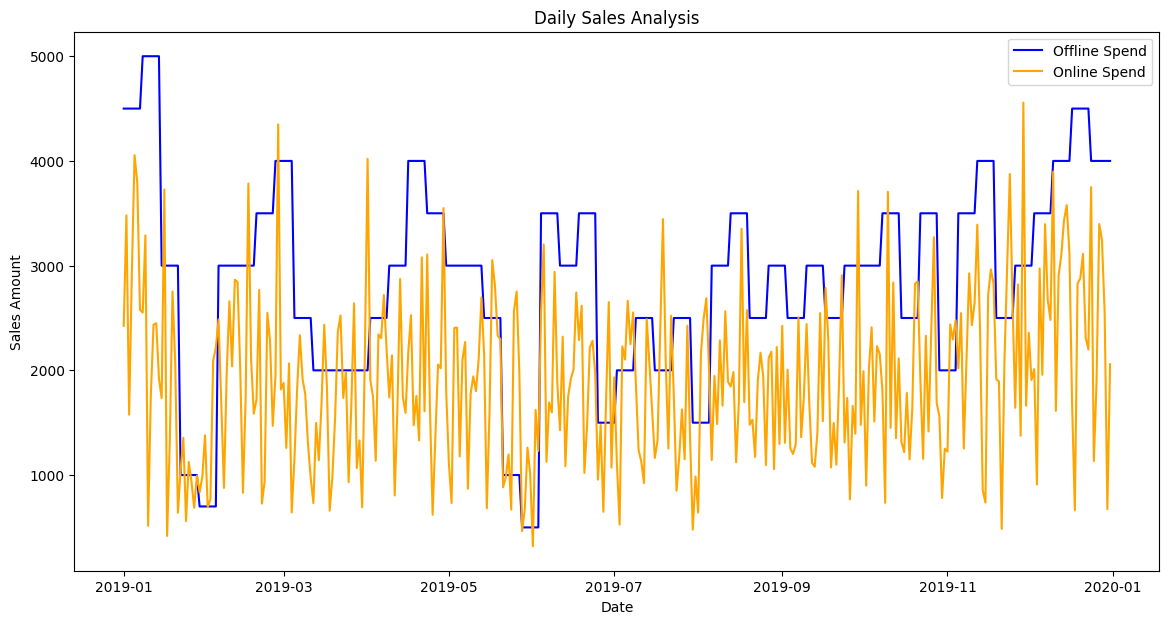

In [83]:
# 날짜별 매출 분석
daily_sales = df3.groupby('Date').agg({'Offline_Spend': 'sum', 'Online_Spend': 'sum'}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Offline_Spend'], label='Offline Spend', color='blue')
plt.plot(daily_sales['Date'], daily_sales['Online_Spend'], label='Online Spend', color='orange')
plt.title('Daily Sales Analysis')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [93]:
daily_sales

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


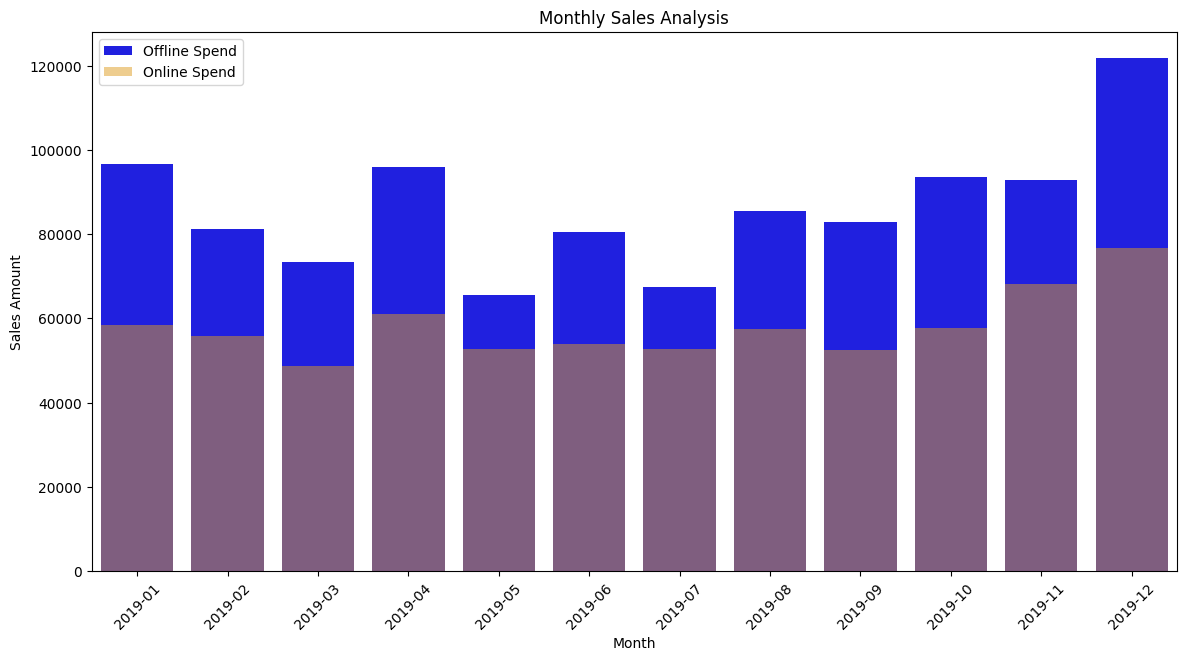

In [87]:
# 월별 매출 분석
df3['Month'] = df3['Date'].dt.to_period('M')
monthly_sales = df3.groupby('Month').agg({'Offline_Spend': 'sum', 'Online_Spend': 'sum'}).reset_index()

plt.figure(figsize=(14, 7))
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # 문자열로 변환
sns.barplot(x='Month', y='Offline_Spend', data=monthly_sales, color='blue', label='Offline Spend')
sns.barplot(x='Month', y='Online_Spend', data=monthly_sales, color='orange', label='Online Spend', alpha=0.5)
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [88]:
# 매출 비율 분석
total_sales = monthly_sales['Offline_Spend'] + monthly_sales['Online_Spend']
monthly_sales['Total_Spend'] = total_sales
monthly_sales['Offline_Ratio'] = monthly_sales['Offline_Spend'] / monthly_sales['Total_Spend']
monthly_sales['Online_Ratio'] = monthly_sales['Online_Spend'] / monthly_sales['Total_Spend']

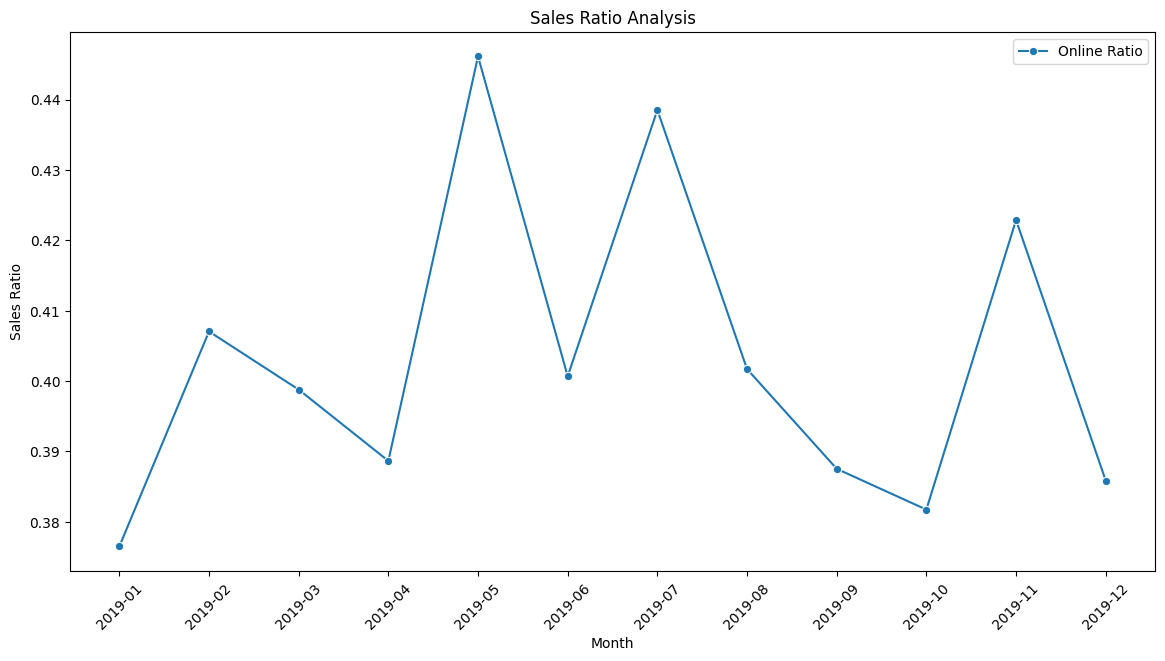

In [91]:
# 비율 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Online_Ratio', label='Online Ratio', marker='o')
plt.title('Sales Ratio Analysis')
plt.xlabel('Month')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.show()

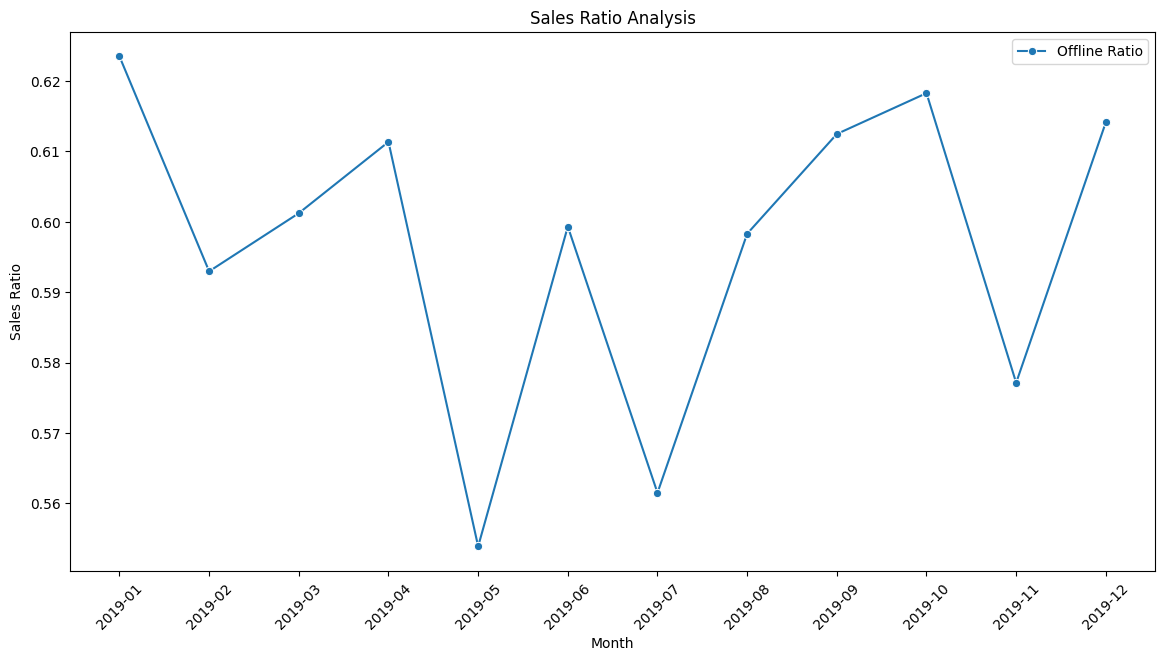

In [92]:
# 비율 시각화
# 오프라인이 변동폭이 큼 -> 오프라인 매출이 떨어지면 온라인 매출이 상승함을 확인할 수 있음
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Offline_Ratio', label='Offline Ratio', marker='o')
plt.title('Sales Ratio Analysis')
plt.xlabel('Month')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### 결론
- 오프라인 매출이 하락하는 월에는 온라인 매출이 상승함을 확인할 수 있음
- 온라인 매출 상승 : 2,5,7,11월
- 오프라인 매출 상승 : 1,4,6,10,12월
- 온라인에서 계절에 따라 어떤 프로모션을 진행하는지? (할인률과 온라인, 오프라인의 연관성?)


### 3) 할인쿠폰 분석

In [144]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


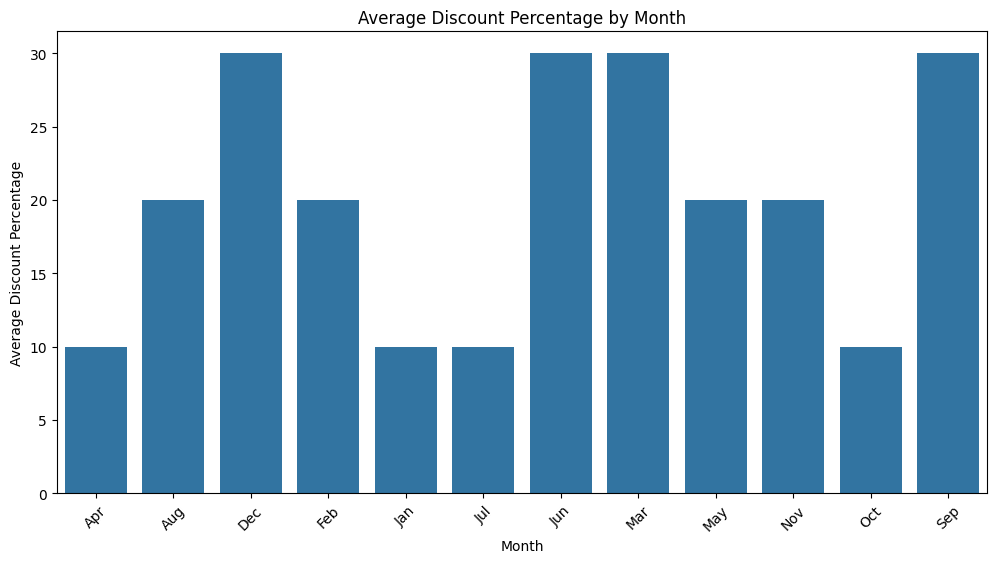

In [145]:
# 월별 평균 할인율 분석
monthly_discount = df2.groupby('Month')['Discount_pct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Discount_pct', data=monthly_discount)
plt.title('Average Discount Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45)
plt.show()

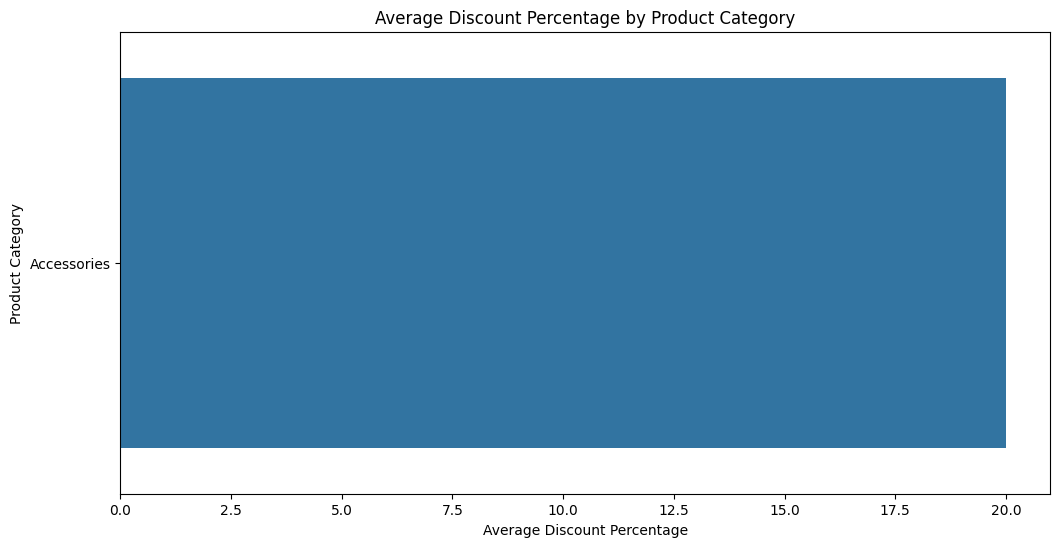

In [135]:
# 제품 카테고리별 할인율 분석
category_discount = df2.groupby('Product_Category')['Discount_pct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Discount_pct', y='Product_Category', data=category_discount.sort_values('Discount_pct', ascending=False))
plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Product Category')
plt.show()

   Coupon_Code  Discount_pct
47      WEMP30          30.0
11        BT30          30.0
32        NE30          30.0
38     NOTES30          30.0
29       NCA30          30.0
26       HOU30          30.0
23     HGEAR30          30.0
20        GC30          30.0
17     EXTRA30          30.0
14      ELEC30          30.0
41       OFF30          30.0
35        NJ30          30.0
44      SALE30          30.0
2        ACC30          30.0
8        AND30          30.0
5        AIO30          30.0
1        ACC20          20.0
34        NJ20          20.0
37     NOTES20          20.0
31        NE20          20.0
46      WEMP20          20.0
4        AIO20          20.0
28       NCA20          20.0
25       HOU20          20.0
10        BT20          20.0
43      SALE20          20.0
22     HGEAR20          20.0
40       OFF20          20.0
7        AND20          20.0
19        GC20          20.0
16     EXTRA20          20.0
13      ELEC20          20.0
39       OFF10          10.0
36     NOTES10

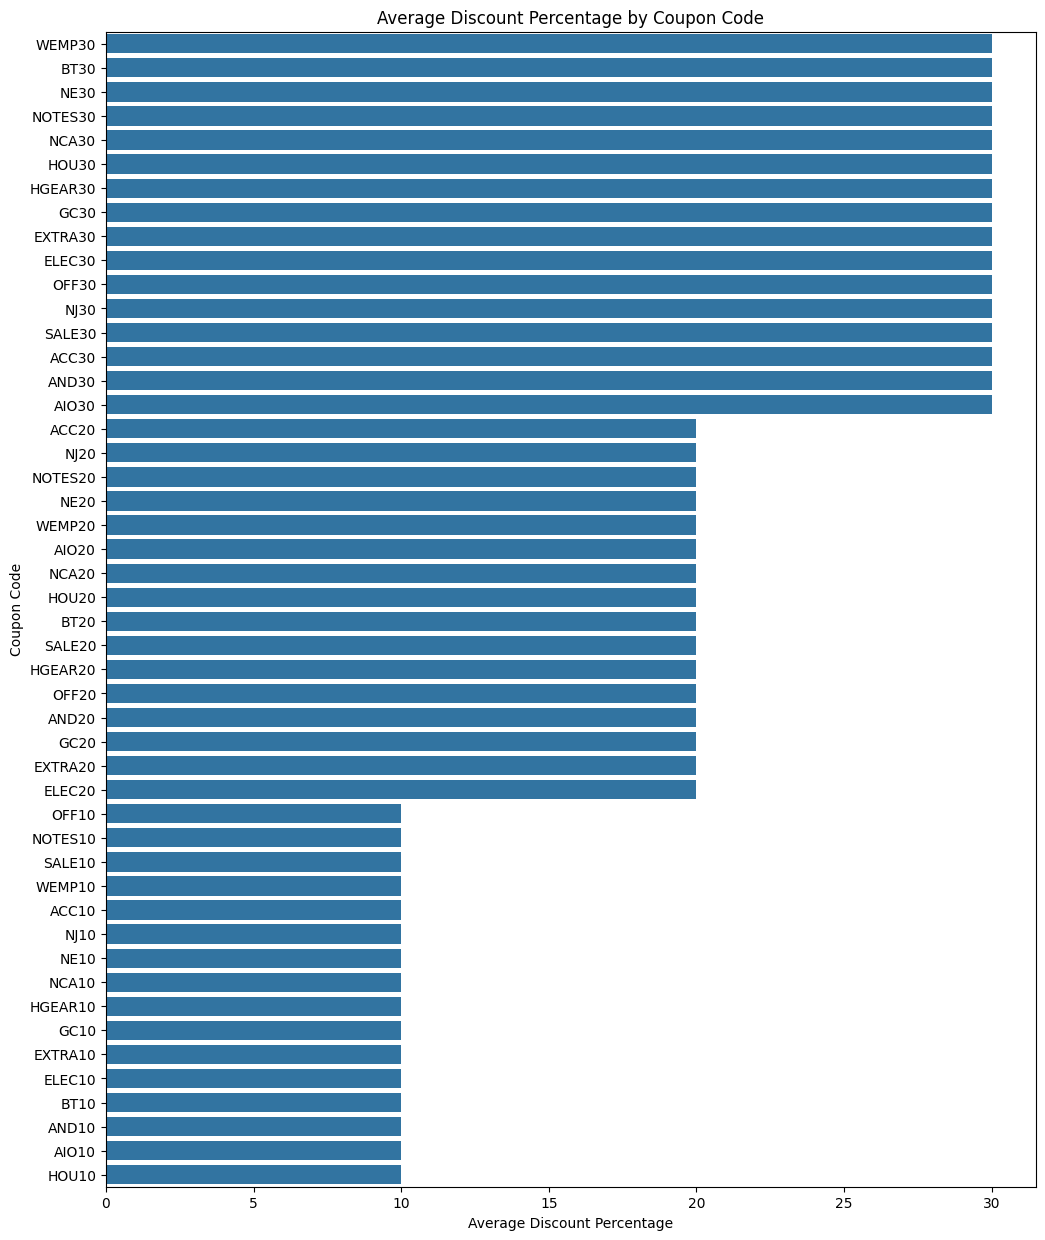

In [136]:
# 쿠폰 코드별 할인율 분석
coupon_discount = df2.groupby('Coupon_Code')['Discount_pct'].mean().reset_index()
print(coupon_discount.sort_values(ascending=False, by='Discount_pct'))

plt.figure(figsize=(12, 15))
sns.barplot(x='Discount_pct', y='Coupon_Code', data=coupon_discount.sort_values('Discount_pct', ascending=False))
plt.title('Average Discount Percentage by Coupon Code')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Coupon Code')
plt.show()


In [109]:
df2

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [146]:
df2[df2['Product_Category'] == 'Apparel']

,Month,Product_Category,Coupon_Code,Discount_pct


In [124]:
# 월별 및 상품별 평균 할인률 계산
monthly_product_discount = df2.groupby(['Month', 'Product_Category'])['Discount_pct'].mean().reset_index()

# 각 월별로 할인률이 가장 높은 상품 추출
highest_discount_products = monthly_product_discount.loc[monthly_product_discount.groupby('Month')['Discount_pct'].idxmax()]

# 결과 출력
print(highest_discount_products.sort_values(ascending=False, by='Discount_pct'))


   Month Product_Category  Discount_pct
2    Dec      Accessories          30.0
6    Jun      Accessories          30.0
7    Mar      Accessories          30.0
11   Sep      Accessories          30.0
1    Aug      Accessories          20.0
3    Feb      Accessories          20.0
8    May      Accessories          20.0
9    Nov      Accessories          20.0
0    Apr      Accessories          10.0
4    Jan      Accessories          10.0
5    Jul      Accessories          10.0
10   Oct      Accessories          10.0


In [130]:
df2['Product_Category']

0      Accessories
1      Accessories
2      Accessories
3      Accessories
4      Accessories
          ...     
199    Accessories
200    Accessories
201    Accessories
202    Accessories
203    Accessories
Name: Product_Category, Length: 204, dtype: object

In [141]:
df = df2[df2['Product_Category'] == 'Accessories']
df

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Accessories,SALE10,10
1,Feb,Accessories,SALE20,20
2,Mar,Accessories,SALE30,30
3,Jan,Accessories,ELEC10,10
4,Feb,Accessories,ELEC20,20
...,...,...,...,...
199,Nov,Accessories,NJ20,20
200,Dec,Accessories,NJ30,30
201,Oct,Accessories,AND10,10
202,Nov,Accessories,AND20,20


In [ ]:
total_purchase = merged_df.groupby('CustomerID')['Avg_Price'].sum()
total_purchase.sort_values(ascending=False)

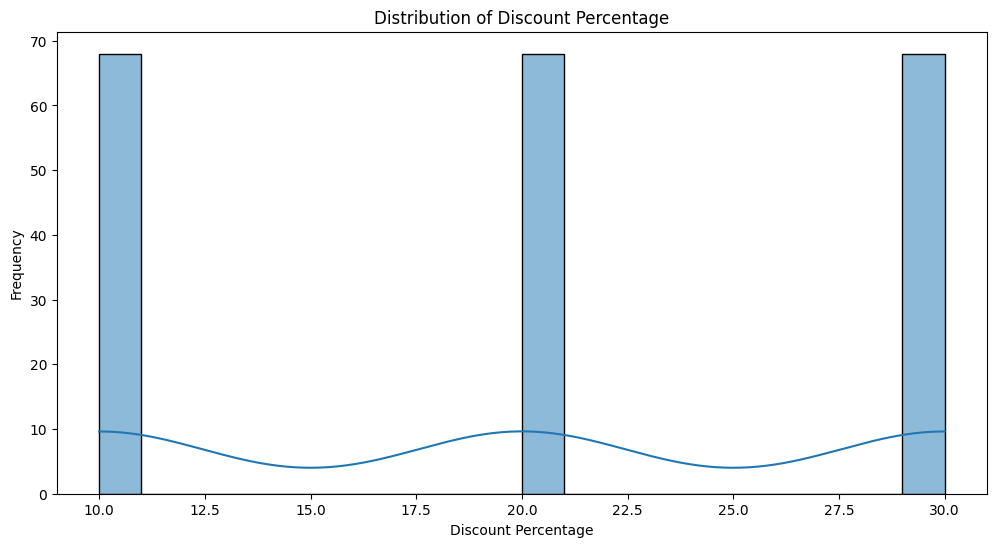

In [127]:
# 할인율 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df2['Discount_pct'], bins=20, kde=True)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

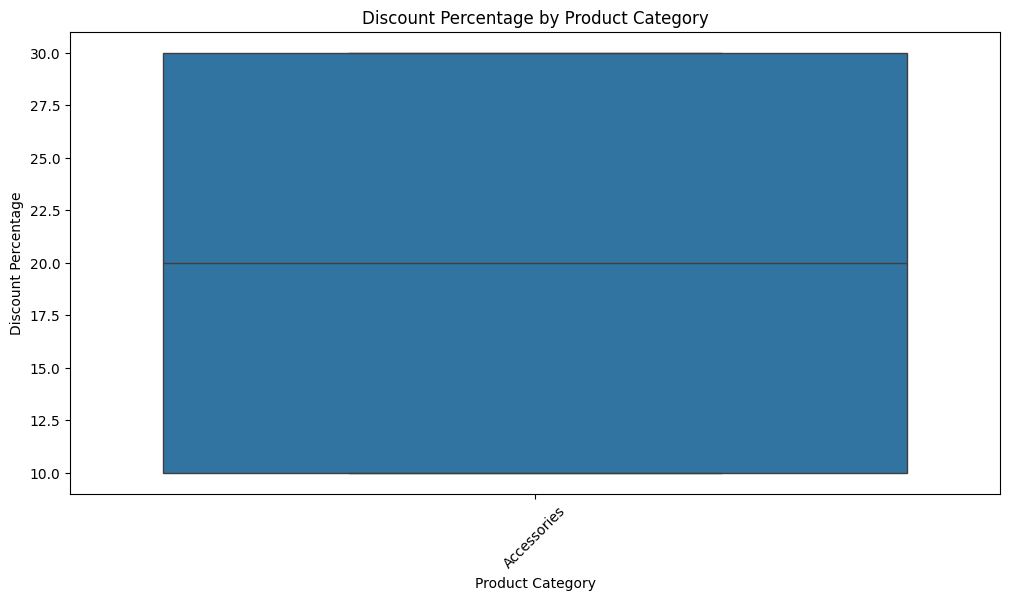

In [128]:
# 상자 그림으로 할인율 분석
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Category', y='Discount_pct', data=df2)
plt.title('Discount Percentage by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=45)
plt.show()

#### 결론
- 악세서리의 할인률이 가장 높음 (2,6,7,11월에 할인 30%) -> 온라인 매출에 악세서리가 영향을 주는지? (온라인 매출이 2,5,7,11월에 높았음)
- 할인률은 10%, 20%, 30%가 가장 많음

#### 더 해볼 수 있는 고민
- 매출이 가장 높았던 상품군은 office 상품인데 악세서리의 할인률이 판매량에 영향을 주지는 않는 것 같음 (즉, 할인률이 매출에 큰 영향을 주는지 확인 필요)